In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DATA ANALYSIS

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(f'{len(cat_cols)} Categorical Columns')
print(f'{len(num_cols)} Numerical Columns')

18 Categorical Columns
3 Numerical Columns


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


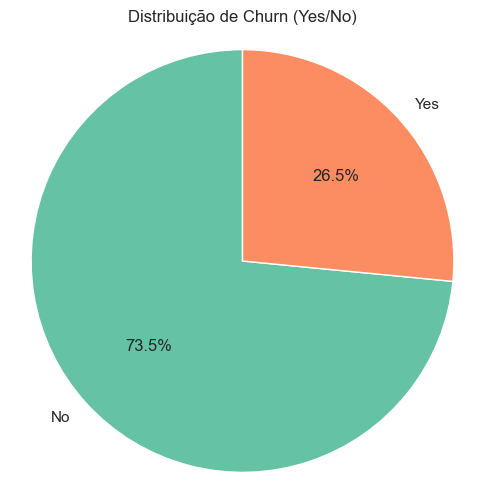

In [5]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Distribuição de Churn (Yes/No)")
plt.axis('equal')
plt.show()

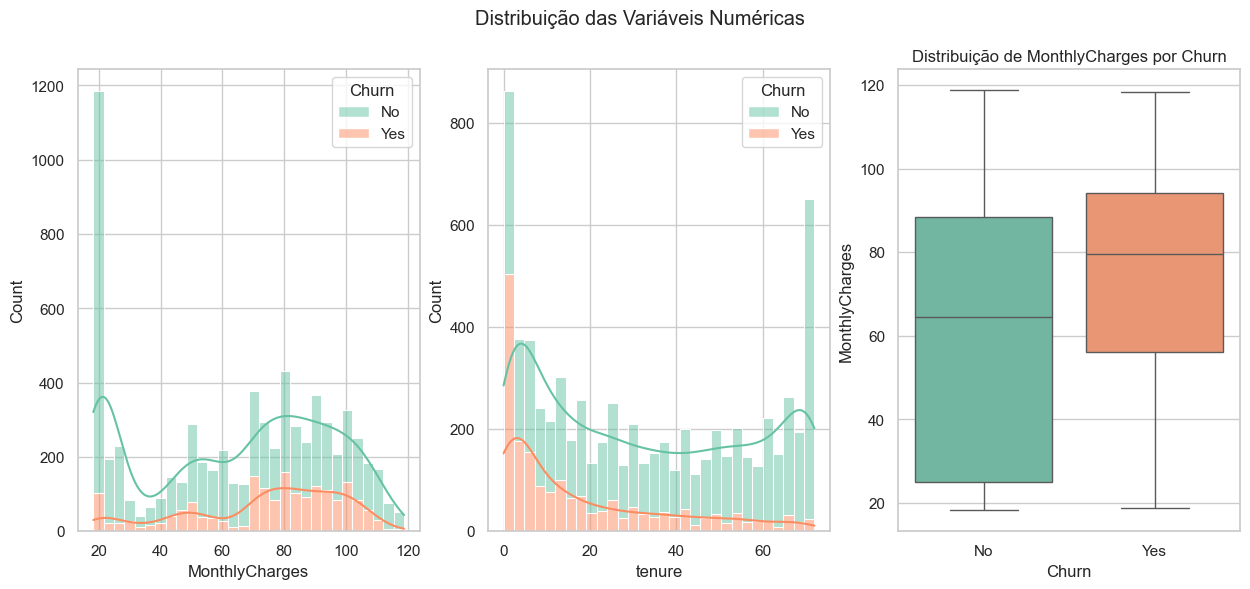

In [15]:
plt.figure(figsize=(15, 6))
plt.suptitle('Distribuição das Variáveis Numéricas')

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, palette="Set2", kde=True)

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette="Set2", kde=True)

# Distribuição de MonthlyCharges com Churn
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2', hue='Churn')
plt.title('Distribuição de MonthlyCharges por Churn')
plt.show()

Text(0.5, 1.0, 'Relação entre Payment Method e Churn')

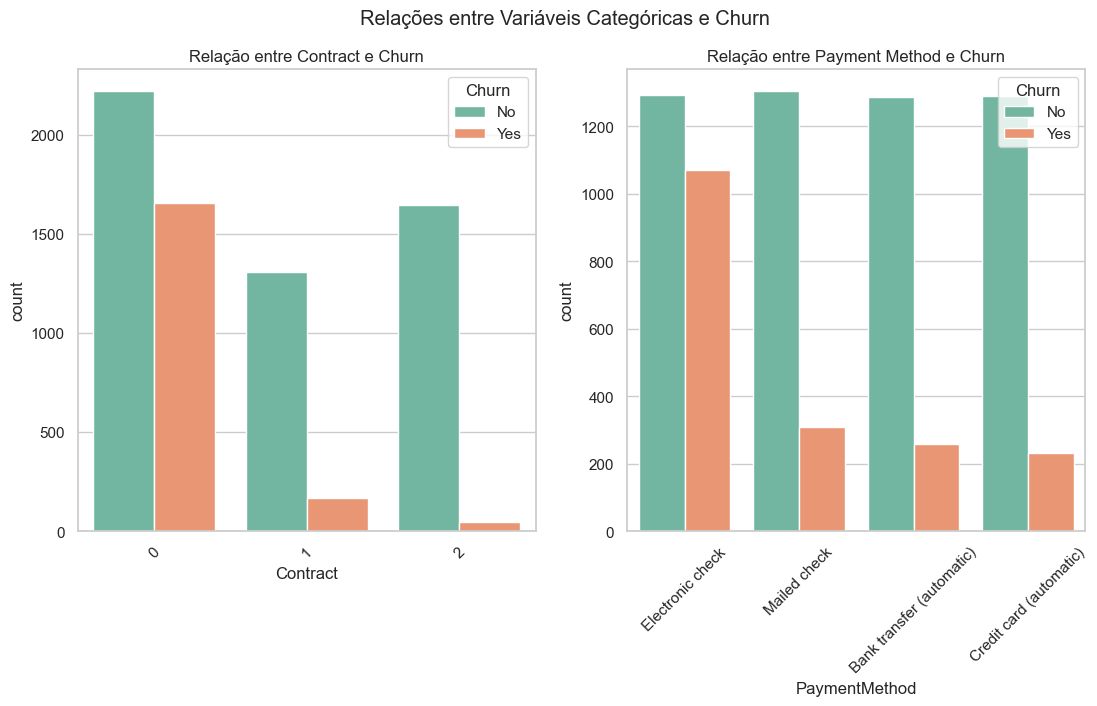

In [17]:
plt.figure(figsize=(13, 6))
plt.suptitle('Relações entre Variáveis Categóricas e Churn')

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.xticks(rotation=45)
plt.title('Relação entre Contract e Churn')

# Relação entre Payment Method e Churn
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.xticks(rotation=45)
plt.title('Relação entre Payment Method e Churn')



In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

contract_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
df['Contract'] = df['Contract'].map(contract_mapping)

churn_data_encoded = pd.get_dummies(df, drop_first=True)
churn_data_encoded.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
churn_data_encoded.head()

11


,SeniorCitizen,tenure,Contract,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,customerID_0017-IUDMW,customerID_0018-NYROU,customerID_0019-EFAEP,customerID_0019-GFNTW,customerID_0020-INWCK,customerID_0020-JDNXP,customerID_0021-IKXGC,customerID_0022-TCJCI,customerID_0023-HGHWL,customerID_0023-UYUPN,customerID_0023-XUOPT,customerID_0027-KWYKW,customerID_0030-FNXPP,customerID_0031-PVLZI,customerID_0032-PGELS,customerID_0036-IHMOT,customerID_0040-HALCW,customerID_0042-JVWOJ,customerID_0042-RLHYP,customerID_0048-LUMLS,customerID_0048-PIHNL,customerID_0052-DCKON,customerID_0052-YNYOT,customerID_0056-EPFBG,customerID_0057-QBUQH,customerID_0058-EVZWM,customerID_0060-FUALY,customerID_0064-SUDOG,customerID_0064-YIJGF,customerID_0067-DKWBL,customerID_0068-FIGTF,customerID_0071-NDAFP,customerID_0074-HDKDG,customerID_0076-LVEPS,customerID_0078-XZMHT,customerID_0080-EMYVY,customerID_0080-OROZO,customerID_0082-LDZUE,customerID_0082-OQIQY,customerID_0083-PIVIK,customerID_0089-IIQKO,customerID_0093-EXYQL,customerID_0093-XWZFY,customerID_0094-OIFMO,customerID_0096-BXERS,customerID_0096-FCPUF,customerID_0098-BOWSO,customerID_0100-DUVFC,customerID_0103-CSITQ,customerID_0104-PPXDV,customerID_0106-GHRQR,customerID_0106-UGRDO,customerID_0107-WESLM,customerID_0107-YHINA,customerID_0111-KLBQG,customerID_0112-QAWRZ,customerID_0112-QWPNC,customerID_0114-IGABW,customerID_0114-PEGZZ,customerID_0114-RSRRW,customerID_0115-TFERT,customerID_0117-LFRMW,customerID_0118-JPNOY,customerID_0121-SNYRK,customerID_0122-OAHPZ,customerID_0123-CRBRT,customerID_0125-LZQXK,customerID_0128-MKWSG,customerID_0129-KPTWJ,customerID_0129-QMPDR,customerID_0130-SXOUN,customerID_0133-BMFZO,customerID_0134-XWXCE,customerID_0135-NMXAP,customerID_0136-IFMYD,customerID_0137-OCGAB,customerID_0137-UDEUO,customerID_0139-IVFJG,customerID_0141-YEAYS,customerID_0142-GVYSN,customerID_0147-ESWWR,customerID_0148-DCDOS,customerID_0151-ONTOV,customerID_0156-FVPTA,customerID_0164-APGRB,customerID_0164-XAIRP,customerID_0168-XZKBB,customerID_0174-QRVVY,customerID_0177-PXBAT,customerID_0178-CIIKR,customerID_0178-SZBHO,customerID_0181-RITDD,customerID_0186-CAERR,customerID_0187-QSXOE,customerID_0187-WZNAB,customerID_0188-GWFLE,customerID_0191-EQUUH,customerID_0191-ZHSKZ,customerID_0193-ESZXP,customerID_0195-IESCP,customerID_0196-JTUQI,customerID_0196-VULGZ,customerID_0197-PNKNK,customerID_0201-MIBOL,customerID_0201-OAMXR,customerID_0203-HHYIJ,customerID_0206-OYVOC,customerID_0206-TBWLC,customerID_0207-MDKNV,customerID_0208-BPQEJ,customerID_0212-ISBBF,customerID_0214-JHPFW,customerID_0215-BQKGS,customerID_0218-QNVAS,customerID_0219-QAERP,customerID_0219-YTZUE,customerID_0220-EBGCE,customerID_0221-NAUXK,customerID_0221-WMXNQ,customerID_0222-CNVPT,customerID_0224-HJAPT,customerID_0224-NIJLP,customerID_0224-RLWWD,customerID_0225-ZORZP,customerID_0228-MAUWC,customerID_0229-LFJAF,customerID_0230-UBYPQ,customerID_0230-WEQUW,customerID_0231-LXVAP,customerID_0233-FTHAV,customerID_0234-TEVTT,customerID_0235-KGSLC,customerID_0236-HFWSV,customerID_0237-YFUTL,customerID_0238-WHBIQ,customerID_0239-OXEXL,customerID_0244-LGNFY,customerID_0247-SLUJI,customerID_0248-IPDFW,customerID_0248-PGHBZ,customerID_0253-ZTEOB,customerID_0254-FNMCI,customerID_0254-KCJGT,customerID_0254-WWRKD,customerID_0256-LTHVJ,customerID_0257-KXZGU,customerID_0257-ZESQC,customerID_0258-NOKBL,customerID_0259-GBZSH,customerID_0260-ZDLGK,customerID_0263-FJTQO,customerID_0264-CNITK,customerID_0265-EDXBD,customerID_0265-PSUAE,customerID_0266-CLZKZ,customerID_0266-GMEAO,customerID_0268-QKIWO,customerID_0269-XFESX,customerID_0270-THENM,customerID_0274-JKUJR,customerID_0277-BKSQP,customerID_0277-ORXQS,customerID_0278-YXOOG,customerID_0280-XJGEX,customerID_0281-CNTZX,customerID_0282-NVSJS,customerID_0285-INHLN,customerID_0289-IVARM,customerID_0292-WEGCH,customerID_0295-

# AUTOGLUON

In [9]:
from autogluon.tabular import TabularPredictor

label = 'Churn'

churn_data_encoded = pd.get_dummies(df, drop_first=True)
churn_data_encoded.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

X = churn_data_encoded.sample(frac=0.8, random_state=1)
test_data = churn_data_encoded.drop(X.index)

# Treinar o modelo com o AutoGluon sem o preset 'best_quality'
predictor = TabularPredictor(label=label, eval_metric='accuracy', problem_type='binary', path='models')

## TRAIN MODEL

In [10]:
# predictor.fit(churn_data_encoded)
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)

## OR LOAD PRE TRAINED

In [11]:
model = predictor.load('models')

## EVALUATE MODEL

In [12]:
model.predict(test_data)
model.evaluate(test_data)

2024-09-06 11:03:57,766	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


{'accuracy': 0.8466997870830376,
 'balanced_accuracy': 0.7697317272773772,
 'mcc': 0.589183282867853,
 'roc_auc': 0.9111375377218556,
 'f1': 0.6795252225519288,
 'precision': 0.7789115646258503,
 'recall': 0.6026315789473684}